$1.$ Download the Australian weather data Dataset and preprocess the dataset

$2.$ [R] Convert the values of the following features into the bands/categories given as below:
• Temp9am : {cat1: x < 15, cat2: 15 ≤ x ≤ 26, cat3: x > 26 }
• Temp3pm : {cat1: x < 24, cat2: 24 ≤ x ≤ 36, cat3: x > 36 }
• WindSpeed9am: {cat1: x < 16, cat2: x ≥ 16 }
• WindSpeed3pm: {cat1: x < 15, cat2: x ≥ 15 }

$3.$ [R] Set up Bayesian Belief Network for the structure mentioned in the Fig 1
You are referred to the nice blog given by Towards Data Science to do the mentioned steps BBN: Bayesian
Belief Networks — How to Build Them Effectively in Python

$4.$ [R] Check the built network by drawing the graph

$5.$ [R] For the following each of evidence, predict whether it will rain tomorrow or not and report the change in
the probabilities of other variables:

• Evidence 1: Time: 9 am, temperature: 30

• Evidence 2: Time: 9 am, temperature: 10

• Evidence 3: Time: 3 pm, temperature: 26

• Evidence 4: Time: 3 pm, temperature: 11

• Evidence 5: Time: 9 am, Wind speed: 11

• Evidence 6: Time: 3 pm, Wind speed: 19

In [6]:
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt 
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController

In [7]:
pd.options.display.max_columns=50
df=pd.read_csv('weatherAUS.csv', encoding='utf-8')

In [8]:
df

Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0      2008-12-01         Albury     13.4     22.9       0.6          NaN   
1      2008-12-02         Albury      7.4     25.1       0.0          NaN   
2      2008-12-03         Albury     12.9     25.7       0.0          NaN   
3      2008-12-04         Albury      9.2     28.0       0.0          NaN   
4      2008-12-05         Albury     17.5     32.3       1.0          NaN   
...           ...            ...      ...      ...       ...          ...   
21895  2011-02-16  NorfolkIsland     21.9     26.1       0.0          6.4   
21896  2011-02-17  NorfolkIsland     22.0     27.0       0.0          4.0   
21897  2011-02-18  NorfolkIsland     22.9     28.0       3.4          3.8   
21898  2011-02-19  NorfolkIsland     22.2     26.9       4.2          5.2   
21899  2011-02-20  NorfolkIsland     20.0     25.0       NaN          NaN   

       Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0           NaN           W           44.0          W        WNW   
1           NaN         WNW           44.0        NNW        WSW   
2           NaN         WSW           46.0          W        WSW   
3           NaN          NE           24.0         SE          E   
4           NaN           W           41.0        ENE         NW   
...         ...         ...            ...        ...        ...   
21895       8.2         ESE           46.0        ESE        ESE   
21896       4.0         ESE           48.0        ESE        ESE   
21897       2.0         ENE           37.0          E        ENE   
21898      10.7           E           43.0          E        ESE   
21899       NaN         NaN            NaN        NaN        NaN   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0              20.0          24.0         71.0         22.0       1007.7   
1               4.0          22.0         44.0         25.0       1010.6   
2              19.0          26.0         38.0         30.0       1007.6   
3              11.0           9.0         45.0         16.0       1017.6   
4               7.0          20.0         82.0         33.0       1010.8   
...             ...           ...          ...          ...          ...   
21895          24.0          28.0         75.0         69.0       1018.2   
21896          20.0          28.0         79.0         82.0       1015.9   
21897          17.0          26.0         89.0         77.0       1014.7   
21898          26.0          30.0         80.0         69.0       1015.9   
21899           NaN           NaN          NaN          NaN          NaN   

       Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0           1007.1       8.0       NaN     16.9     21.8        No   
1           1007.8       NaN       NaN     17.2     24.3        No   
2           1008.7       NaN       2.0     21.0     23.2        No   
3           1012.8       NaN       NaN     18.1     26.5        No   
4           1006.0       7.0       8.0     17.8     29.7        No   
...            ...       ...       ...      ...      ...       ...   
21895       1016.4       7.0       6.0     24.2     25.6        No   
21896       1014.3       7.0       7.0     25.4     25.0        No   
21897       1014.0       7.0       7.0     25.1     27.0       Yes   
21898       1014.5       4.0       6.0     25.2     25.2       Yes   
21899          NaN       NaN       NaN      NaN      NaN       NaN   

      RainTomorrow  
0               No  
1               No  
2               No  
3               No  
4               No  
...            ...  
21895           No  
21896          Yes  
21897          Yes  
21898           No  
21899          NaN  

[21900 rows x 23 columns]

In [9]:
df=df[pd.isnull(df['RainTomorrow'])==False]
df=df.fillna(df.mean())

<ipython-input-9-1c28a7131ba7>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df.mean())


In [10]:
for column in df.select_dtypes(include=['object']):
    df[column].fillna(df[column].mode()[0], inplace=True)

In [11]:
df

Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0      2008-12-01         Albury     13.4     22.9       0.6     6.128364   
1      2008-12-02         Albury      7.4     25.1       0.0     6.128364   
2      2008-12-03         Albury     12.9     25.7       0.0     6.128364   
3      2008-12-04         Albury      9.2     28.0       0.0     6.128364   
4      2008-12-05         Albury     17.5     32.3       1.0     6.128364   
...           ...            ...      ...      ...       ...          ...   
21894  2011-02-15  NorfolkIsland     21.2     25.6       0.4     5.600000   
21895  2011-02-16  NorfolkIsland     21.9     26.1       0.0     6.400000   
21896  2011-02-17  NorfolkIsland     22.0     27.0       0.0     4.000000   
21897  2011-02-18  NorfolkIsland     22.9     28.0       3.4     3.800000   
21898  2011-02-19  NorfolkIsland     22.2     26.9       4.2     5.200000   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0       8.119565           W           44.0          W        WNW   
1       8.119565         WNW           44.0        NNW        WSW   
2       8.119565         WSW           46.0          W        WSW   
3       8.119565          NE           24.0         SE          E   
4       8.119565           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
21894   9.100000         ESE           48.0        ESE        ESE   
21895   8.200000         ESE           46.0        ESE        ESE   
21896   4.000000         ESE           48.0        ESE        ESE   
21897   2.000000         ENE           37.0          E        ENE   
21898  10.700000           E           43.0          E        ESE   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0              20.0          24.0         71.0         22.0       1007.7   
1               4.0          22.0         44.0         25.0       1010.6   
2              19.0          26.0         38.0         30.0       1007.6   
3              11.0           9.0         45.0         16.0       1017.6   
4               7.0          20.0         82.0         33.0       1010.8   
...             ...           ...          ...          ...          ...   
21894          26.0          30.0         82.0         72.0       1018.2   
21895          24.0          28.0         75.0         69.0       1018.2   
21896          20.0          28.0         79.0         82.0       1015.9   
21897          17.0          26.0         89.0         77.0       1014.7   
21898          26.0          30.0         80.0         69.0       1015.9   

       Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0           1007.1   8.00000  4.334246     16.9     21.8        No   
1           1007.8   4.12321  4.334246     17.2     24.3        No   
2           1008.7   4.12321  2.000000     21.0     23.2        No   
3           1012.8   4.12321  4.334246     18.1     26.5        No   
4           1006.0   7.00000  8.000000     17.8     29.7        No   
...            ...       ...       ...      ...      ...       ...   
21894       1017.0   3.00000  4.000000     23.0     24.2        No   
21895       1016.4   7.00000  6.000000     24.2     25.6        No   
21896       1014.3   7.00000  7.000000     25.4     25.0        No   
21897       1014.0   7.00000  7.000000     25.1     27.0       Yes   
21898       1014.5   4.00000  6.000000     25.2     25.2       Yes   

      RainTomorrow  
0               No  
1               No  
2               No  
3               No  
4               No  
...            ...  
21894           No  
21895           No  
21896          Yes  
21897          Yes  
21898           No  

[21398 rows x 23 columns]

In [12]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [13]:
df.info

<bound method DataFrame.info of              Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0      2008-12-01         Albury     13.4     22.9       0.6     6.128364   
1      2008-12-02         Albury      7.4     25.1       0.0     6.128364   
2      2008-12-03         Albury     12.9     25.7       0.0     6.128364   
3      2008-12-04         Albury      9.2     28.0       0.0     6.128364   
4      2008-12-05         Albury     17.5     32.3       1.0     6.128364   
...           ...            ...      ...      ...       ...          ...   
21894  2011-02-15  NorfolkIsland     21.2     25.6       0.4     5.600000   
21895  2011-02-16  NorfolkIsland     21.9     26.1       0.0     6.400000   
21896  2011-02-17  NorfolkIsland     22.0     27.0       0.0     4.000000   
21897  2011-02-18  NorfolkIsland     22.9     28.0       3.4     3.800000   
21898  2011-02-19  NorfolkIsland     22.2     26.9       4.2     5.200000   

        Sunshine WindGustDir  WindGustSpeed

In [28]:
df['Temp9amCat']=df['Temp9am'].apply(lambda x: 'cat 1: x<15 ' if x<15 else 'cat 2: 15<=x<=26' if 15<x<=26 else 'cat 3: x>26')
df['Temp3pmCat']=df['Temp3pm'].apply(lambda x: 'cat 2: x<24' if x<24 else 'cat 2: 24<=x<=36' if 24<=x<=36 else 'cat 3: x>36')
df['WindSpeed9amCat']=df['WindSpeed9am'].apply(lambda x: 'cat 1: x<16' if x<16 else 'cat 2: x>=16')
df['WindSpeed3pmCat']=df['WindSpeed3pm'].apply(lambda x: 'cat 1: x<15' if x<15 else 'cat 2: x>=15')

In [27]:
df

Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0      2008-12-01         Albury     13.4     22.9       0.6     6.128364   
1      2008-12-02         Albury      7.4     25.1       0.0     6.128364   
2      2008-12-03         Albury     12.9     25.7       0.0     6.128364   
3      2008-12-04         Albury      9.2     28.0       0.0     6.128364   
4      2008-12-05         Albury     17.5     32.3       1.0     6.128364   
...           ...            ...      ...      ...       ...          ...   
21894  2011-02-15  NorfolkIsland     21.2     25.6       0.4     5.600000   
21895  2011-02-16  NorfolkIsland     21.9     26.1       0.0     6.400000   
21896  2011-02-17  NorfolkIsland     22.0     27.0       0.0     4.000000   
21897  2011-02-18  NorfolkIsland     22.9     28.0       3.4     3.800000   
21898  2011-02-19  NorfolkIsland     22.2     26.9       4.2     5.200000   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0       8.119565           W           44.0          W        WNW   
1       8.119565         WNW           44.0        NNW        WSW   
2       8.119565         WSW           46.0          W        WSW   
3       8.119565          NE           24.0         SE          E   
4       8.119565           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
21894   9.100000         ESE           48.0        ESE        ESE   
21895   8.200000         ESE           46.0        ESE        ESE   
21896   4.000000         ESE           48.0        ESE        ESE   
21897   2.000000         ENE           37.0          E        ENE   
21898  10.700000           E           43.0          E        ESE   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0              20.0          24.0         71.0         22.0       1007.7   
1               4.0          22.0         44.0         25.0       1010.6   
2              19.0          26.0         38.0         30.0       1007.6   
3              11.0           9.0         45.0         16.0       1017.6   
4               7.0          20.0         82.0         33.0       1010.8   
...             ...           ...          ...          ...          ...   
21894          26.0          30.0         82.0         72.0       1018.2   
21895          24.0          28.0         75.0         69.0       1018.2   
21896          20.0          28.0         79.0         82.0       1015.9   
21897          17.0          26.0         89.0         77.0       1014.7   
21898          26.0          30.0         80.0         69.0       1015.9   

       Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0           1007.1   8.00000  4.334246     16.9     21.8        No   
1           1007.8   4.12321  4.334246     17.2     24.3        No   
2           1008.7   4.12321  2.000000     21.0     23.2        No   
3           1012.8   4.12321  4.334246     18.1     26.5        No   
4           1006.0   7.00000  8.000000     17.8     29.7        No   
...            ...       ...       ...      ...      ...       ...   
21894       1017.0   3.00000  4.000000     23.0     24.2        No   
21895       1016.4   7.00000  6.000000     24.2     25.6        No   
21896       1014.3   7.00000  7.000000     25.4     25.0        No   
21897       1014.0   7.00000  7.000000     25.1     27.0       Yes   
21898       1014.5   4.00000  6.000000     25.2     25.2       Yes   

      RainTomorrow        Temp9amCat        Temp3pmCat WindSpeed9amCat  \
0               No  cat 2: 15<=x<=26       cat 2: x<24    cat 2: x>=16   
1               No  cat 2: 15<=x<=26  cat 2: 24<=x<=36     cat 1: x<16   
2               No  cat 2: 15<=x<=26       cat 2: x<24    cat 2: x>=16   
3               No  cat 2: 15<=x<=26  cat 2: 24<=x<=36     cat 1: x<16   
4               No  cat 2: 15<=x<=26  cat 2: 24<=x<=36     cat 1: x<16   
...            ...               ...               ...       

In [15]:
def probs(data, child, parent1=None, parent2=None):
    if parent1==None:
        prob=pd.crosstab(data[child], 'Empty', margins=False, normalize='columns').sort_index().to_numpy().reshape(-1).tolist()
    elif parent1!=None:
            if parent2==None:
                prob=pd.crosstab(data[parent1],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
            else:    
                prob=pd.crosstab([data[parent1],data[parent2]],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
    else: print("Error in Probability Frequency Calculations")
    return prob  

In [16]:
T9am = BbnNode(Variable(0, 'T9am', ['<15', '15-26', '>26']), probs(df, child='Temp9amCat'))
T3pm = BbnNode(Variable(1, 'T3pm', ['<24', '24-36', '>36']), probs(df, child='Temp3pmCat', parent1='Temp9amCat'))
WS9am = BbnNode(Variable(2, 'WS9am', ['<16', '>=16']), probs(df, child='WindSpeed9amCat'))
WS3pm = BbnNode(Variable(3, 'WS3pm', ['<15', '>=15']), probs(df, child='WindSpeed3pmCat', parent1='WindSpeed9amCat'))
RT = BbnNode(Variable(4, 'RT', ['No', 'Yes']), probs(df, child='RainTomorrow', parent1='Temp3pmCat', parent2='WindSpeed3pmCat'))
bbn = Bbn() \
    .add_node(T9am) \
    .add_node(T3pm) \
    .add_node(WS9am) \
    .add_node(WS3pm) \
    .add_node(RT) \
    .add_edge(Edge(T9am, T3pm, EdgeType.DIRECTED)) \
    .add_edge(Edge(T3pm, RT, EdgeType.DIRECTED)) \
    .add_edge(Edge(WS9am, WS3pm, EdgeType.DIRECTED)) \
    .add_edge(Edge(WS3pm, RT, EdgeType.DIRECTED))
join_tree = InferenceController.apply(bbn)

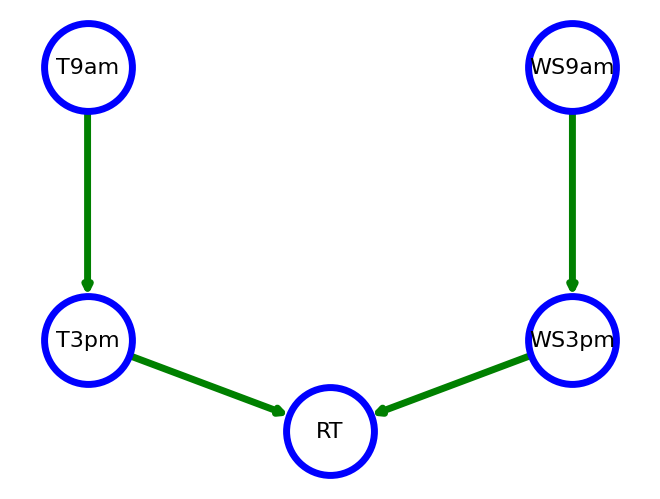

In [17]:
pos = {0: (-1, 2), 1: (-1, 0.5), 2: (1, 2), 3: (1, 0.5), 4: (0, 0)}
options = {
    "font_size": 16,
    "node_size": 4000,
    "node_color": "white",
    "edgecolors": "blue",
    "edge_color": "green",
    "linewidths": 5,
    "width": 5,}
n, d = bbn.to_nx_graph()
nx.draw(n, with_labels=True, labels=d, pos=pos, **options)
ax = plt.gca()
ax.margins(0.10)
plt.axis("off")
plt.show()

In [29]:
def print_probs():
    for node in join_tree.get_bbn_nodes():
        potential = join_tree.get_bbn_potential(node)
        print("Node:", node)
        print("Values:")
        print(potential)
print_probs()

Node: 3|WS3pm|<15,>=15
Values:
3=<15|0.40985
3=>=15|0.59015
Node: 2|WS9am|<16,>=16
Values:
2=<16|0.68796
2=>=16|0.31204
Node: 1|T3pm|<24,24-36,>36
Values:
1=<24|0.34732
1=24-36|0.62725
1=>36|0.02542
Node: 0|T9am|<15,15-26,>26
Values:
0=<15|0.30316
0=15-26|0.64034
0=>26|0.05650
Node: 4|RT|No,Yes
Values:
4=No|0.78508
4=Yes|0.21492


In [31]:
def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name(nod)) \
    .with_evidence(cat, val) \
    .build()
    join_tree.set_observation(ev)

In [39]:
evidence('ev1', 'T9am', '15-26', 1.0)
print_probs()

Node: 3|WS3pm|<15,>=15
Values:
3=<15|0.40985
3=>=15|0.59015
Node: 2|WS9am|<16,>=16
Values:
2=<16|0.68796
2=>=16|0.31204
Node: 1|T3pm|<24,24-36,>36
Values:
1=<24|0.49117
1=24-36|0.50109
1=>36|0.00774
Node: 0|T9am|<15,15-26,>26
Values:
0=<15|0.00000
0=15-26|1.00000
0=>26|0.00000
Node: 4|RT|No,Yes
Values:
4=No|0.79809
4=Yes|0.20191


In [40]:
evidence('ev2', 'T9am', '<15', 1.0)
print_probs()

Node: 3|WS3pm|<15,>=15
Values:
3=<15|0.40985
3=>=15|0.59015
Node: 2|WS9am|<16,>=16
Values:
2=<16|0.68796
2=>=16|0.31204
Node: 1|T3pm|<24,24-36,>36
Values:
1=<24|0.01773
1=24-36|0.98227
1=>36|0.00000
Node: 0|T9am|<15,15-26,>26
Values:
0=<15|1.00000
0=15-26|0.00000
0=>26|0.00000
Node: 4|RT|No,Yes
Values:
4=No|0.74475
4=Yes|0.25525


In [41]:
evidence('ev3', 'T3pm', '24-36', 1.0)
print_probs()

Node: 3|WS3pm|<15,>=15
Values:
3=<15|0.40985
3=>=15|0.59015
Node: 2|WS9am|<16,>=16
Values:
2=<16|0.68796
2=>=16|0.31204
Node: 1|T3pm|<24,24-36,>36
Values:
1=<24|0.00000
1=24-36|1.00000
1=>36|0.00000
Node: 0|T9am|<15,15-26,>26
Values:
0=<15|1.00000
0=15-26|0.00000
0=>26|0.00000
Node: 4|RT|No,Yes
Values:
4=No|0.74280
4=Yes|0.25720


In [42]:
evidence('ev4', 'T3pm', '<24', 1.0)
print_probs()

Node: 3|WS3pm|<15,>=15
Values:
3=<15|0.40985
3=>=15|0.59015
Node: 2|WS9am|<16,>=16
Values:
2=<16|0.68796
2=>=16|0.31204
Node: 1|T3pm|<24,24-36,>36
Values:
1=<24|1.00000
1=24-36|0.00000
1=>36|0.00000
Node: 0|T9am|<15,15-26,>26
Values:
0=<15|1.00000
0=15-26|0.00000
0=>26|0.00000
Node: 4|RT|No,Yes
Values:
4=No|0.85287
4=Yes|0.14713


In [43]:
evidence('ev5', 'T9am', '<15', 1.0)
print_probs()

Node: 3|WS3pm|<15,>=15
Values:
3=<15|0.40985
3=>=15|0.59015
Node: 2|WS9am|<16,>=16
Values:
2=<16|0.68796
2=>=16|0.31204
Node: 1|T3pm|<24,24-36,>36
Values:
1=<24|1.00000
1=24-36|0.00000
1=>36|0.00000
Node: 0|T9am|<15,15-26,>26
Values:
0=<15|0.01547
0=15-26|0.90554
0=>26|0.07898
Node: 4|RT|No,Yes
Values:
4=No|0.85287
4=Yes|0.14713


In [44]:
evidence('ev6', 'T3pm', '<24', 1.0)
print_probs()

Node: 3|WS3pm|<15,>=15
Values:
3=<15|0.40985
3=>=15|0.59015
Node: 2|WS9am|<16,>=16
Values:
2=<16|0.68796
2=>=16|0.31204
Node: 1|T3pm|<24,24-36,>36
Values:
1=<24|0.34732
1=24-36|0.62725
1=>36|0.02542
Node: 0|T9am|<15,15-26,>26
Values:
0=<15|0.30316
0=15-26|0.64034
0=>26|0.05650
Node: 4|RT|No,Yes
Values:
4=No|0.78508
4=Yes|0.21492
